In [1]:
import numpy as np
from scipy import stats

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn import cross_validation
from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
                                                                     y,
                                                                     test_size=0.4)



In [3]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [4]:
expected = y_test
predicted = clf.predict(X_test)

In [5]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.95      0.87      0.91        23
          2       0.86      0.95      0.90        19

avg / total       0.94      0.93      0.93        60



In [6]:
print(metrics.confusion_matrix(expected, predicted))

[[18  0  0]
 [ 0 20  3]
 [ 0  1 18]]


In [7]:
with open("iris.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

In [8]:
import os
os.system("dot -Tpdf iris.dot -o iris.pdf")
os.unlink('iris.dot')

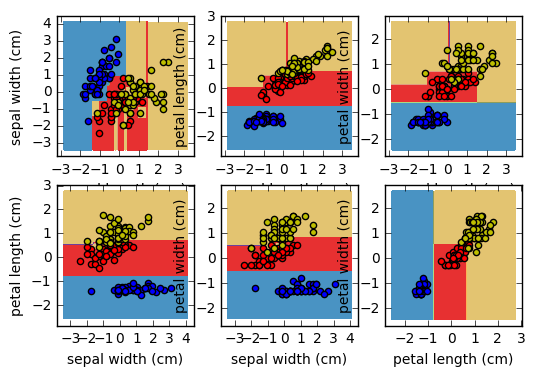

In [9]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):

    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    pairwise_clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2,
                3,
                pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = pairwise_clf.predict(np.c_[xx.ravel(),
                                   yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,
                      yy,
                      Z,
                      cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0],
                    X[idx, 1],
                    c=color,
                    label=iris.target_names[i],
                    cmap=plt.cm.Paired)